In [10]:
import matplotlib.pyplot as plt
import numpy as np
import util

from linear_model import LinearModel


class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m= x.shape[0]
        predictions = np.zeros(m)
        for i in range(m):
            weights = np.exp(-np.sum((self.x - x[i])**2, axis=1) / (2 * self.tau**2))
            W = np.diag(weights)
            # Weighted normal equation
            theta = np.linalg.pinv(self.x.T @ W @ self.x) @ (self.x.T @ W @ self.y)
            predictions[i] = x[i] @ theta
        return predictions

        
        # *** END CODE HERE ***

In [17]:
def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(x_train, y_train)

    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)

    y_pred = clf.predict(x_eval)

    mse = np.mean((y_eval - y_pred) ** 2)
    print(f'Mean Squared Error on validation set: {mse:.4f}')

    mse_train = np.mean((y_train - clf.predict(x_train)) ** 2)
    print(f'Mean Squared Error on training set: {mse_train:.4f}')
    x_raw = x_eval[:, 1]

    # scatter the true evaluation labels
    plt.scatter(x_raw, y_eval,
                label="Eval true",
                marker='o', edgecolor='k', alpha=0.7)

    # scatter the model’s predictions
    plt.scatter(x_raw, y_pred,
                label="LWR pred",
                marker='x', s=50, alpha=0.7)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Evaluation Data vs. LWR Predictions")
    plt.legend()
    plt.grid(True)
    plt.show()


    # *** START CODE HERE ***
    # Fit a LWR model
    # Get MSE value on the validation set
    # Plot validation predictions on top of training set
    # No need to save predictions
    # Plot data
    # *** END CODE HERE ***

Mean Squared Error on validation set: 0.0124
Mean Squared Error on training set: 0.0082


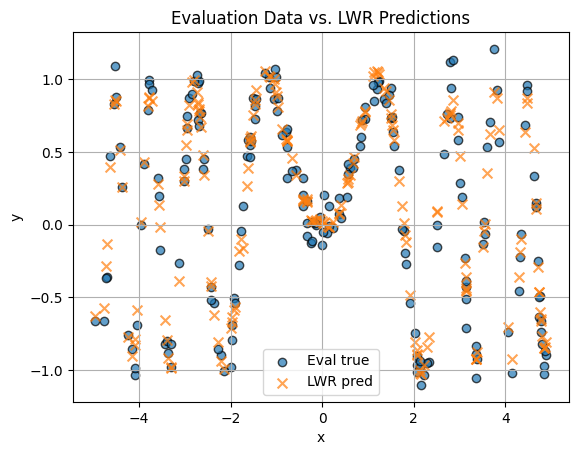

In [29]:
if __name__ == '__main__':
    main(0.05, 'data/ds5_train.csv', 'data/ds5_valid.csv')

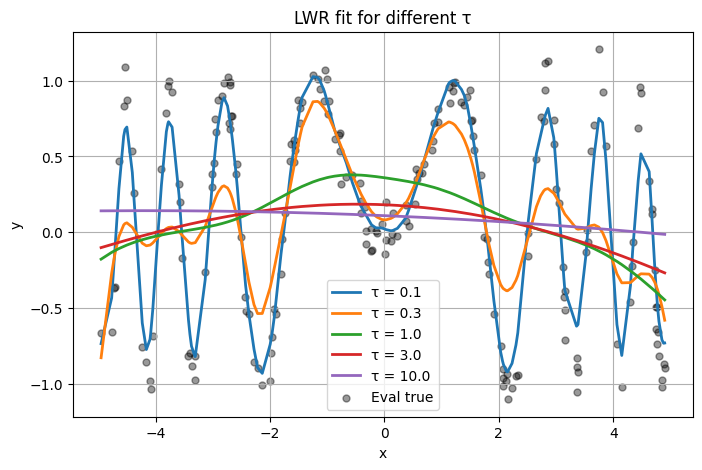

In [25]:

import util

# Load once
x_train, y_train = util.load_dataset("data/ds5_train.csv", add_intercept=True)
x_eval,  y_eval  = util.load_dataset("data/ds5_valid.csv", add_intercept=True)

# Extract the real x-values (drop intercept column)
x_raw = x_eval[:, 1]

# Choose a range of taus to try
taus = [0.1, 0.3, 1.0, 3.0, 10.0]

plt.figure(figsize=(8, 5))
for tau in taus:
    # 1) Fit & predict
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_eval)
    
    # 2) Sort for a smooth curve
    idx = np.argsort(x_raw)
    x_sorted = x_raw[idx]
    y_sorted = y_pred[idx]
    
    # 3) Plot
    plt.plot(x_sorted, y_sorted, lw=2, label=f"τ = {tau}")

# 4) Also scatter the _evaluation_ data
plt.scatter(x_raw, y_eval,
            c='k', s=25, alpha=0.4,
            label="Eval true")

plt.xlabel("x")
plt.ylabel("y")
plt.title("LWR fit for different τ")
plt.legend()
plt.grid(True)
plt.show()
